In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
eth = pd.read_csv("/content/drive/MyDrive/SP5_dataset/Eherium.csv")
btc = pd.read_csv("/content/drive/MyDrive/SP5_dataset/bitcoin_csv (1).csv")
all_crypto = pd.read_csv("/content/drive/MyDrive/SP5_dataset/all crypto.txt")
bouth = pd.read_csv("/content/drive/MyDrive/SP5_dataset/ETH_bouth.csv")

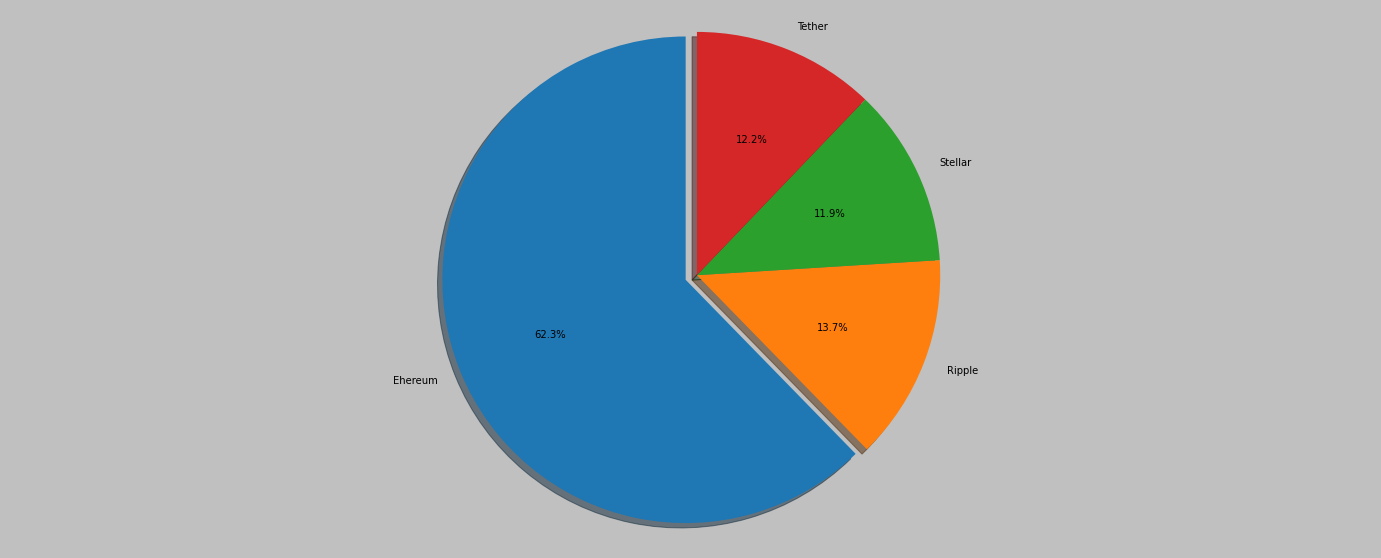

In [36]:
#crypto's domination without bitcoin

#all_crypto.drop(0,axis=0,inplace=True)
#all_crypto.plot(kind='barh',x='Coin',y='capt',figsize=(12,6))
plt.rcParams['text.color'] = 'black'


labels = all_crypto['Coin']
sizes =  all_crypto['capt'] 

labels= [labels[i] for i in range(1,5)] 
sizes = [sizes[i] for i in range(1,5)]   

explode = ( 0.05,0, 0, 0)  # only "explode" the 1st slice Etherium


fig1, ax1 = plt.subplots(figsize=(24.5,10))
fig1.set_facecolor('silver')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90,radius=1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

In [37]:
eth['date']=eth['date'].replace('12/12/2013','')

In [38]:
eth.head(10)

,date,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,medianTxValue(USD),medianFee,averageDifficulty,paymentCount,blockSize,blockCount
0,8/7/2015,5.684487e+06,2050,0.0,2.830000,164329,27437.65625,37.318414,1086,41.611713,0.001321,1.470000e+12,1977,3282693,5189
1,8/8/2015,3.789968e+07,2881,167911008.0,2.790000,674188,27943.43750,68.099970,826,0.279000,0.001243,1.590000e+12,1973,3508878,5256
2,8/9/2015,8.236055e+05,1329,42637600.0,0.706136,532170,27178.28125,14.098950,732,7.061360,0.001223,1.710000e+12,1213,3167541,5123
3,8/10/2015,1.194050e+06,2037,43130000.0,0.713989,405283,27817.34375,31.165144,1001,0.359784,0.001228,1.840000e+12,1451,3316883,5255
4,8/11/2015,1.053130e+06,4963,42796500.0,0.708087,1463100,28027.81250,11.311449,2342,0.034006,0.001218,2.040000e+12,3029,3653834,5280
5,8/12/2015,7.974742e+05,2036,64018400.0,1.060000,2150620,27370.93750,32.586992,906,7.634962,0.001244,2.210000e+12,1479,3348157,5124
6,8/13/2015,2.182920e+06,2842,73935400.0,1.220000,4068680,28268.12500,24.929169,1274,9.947564,0.001210,2.340000e+12,2486,3519008,5286
7,8/14/2015,4.162002e+06,3174,109594000.0,1.810000,4637030,31106.71875,14.354834,1594,18.750143,0.001210,2.670000e+12,3015,3832496,5809
8,8/15/2015,1.390241e+07,2284,109160000.0,1.800000,2554360,28512.65625,8.836593,1313,18.000000,0.001210,3.380000e+12,2170,3435520,5382
9,8/16/2015,2.898480e+06,2440,102028000.0,1.680000,3550790,27094.53125,6.677238,1202,12.007029,0.001208,3.630000e+12,2340,3287835,5132


A random date:  8/8/2015
2015
2016
2017
2018
['2015', '2016', '2017', '2018']
[5808.054794520548, 27558.550684931506, 165804.5576923077, 422943.7264573991] [7095.773972602739, 37314.68493150685, 280203.4423076923, 770476.403587444] [26443.96511130137, 41510.91438356164, 66926.2682864011, 129762.91227578475] [1676.9041095890411, 15662.035616438356, 139089.6291208791, 599681.3677130045]
['2015', '2016', '2017', '2018']


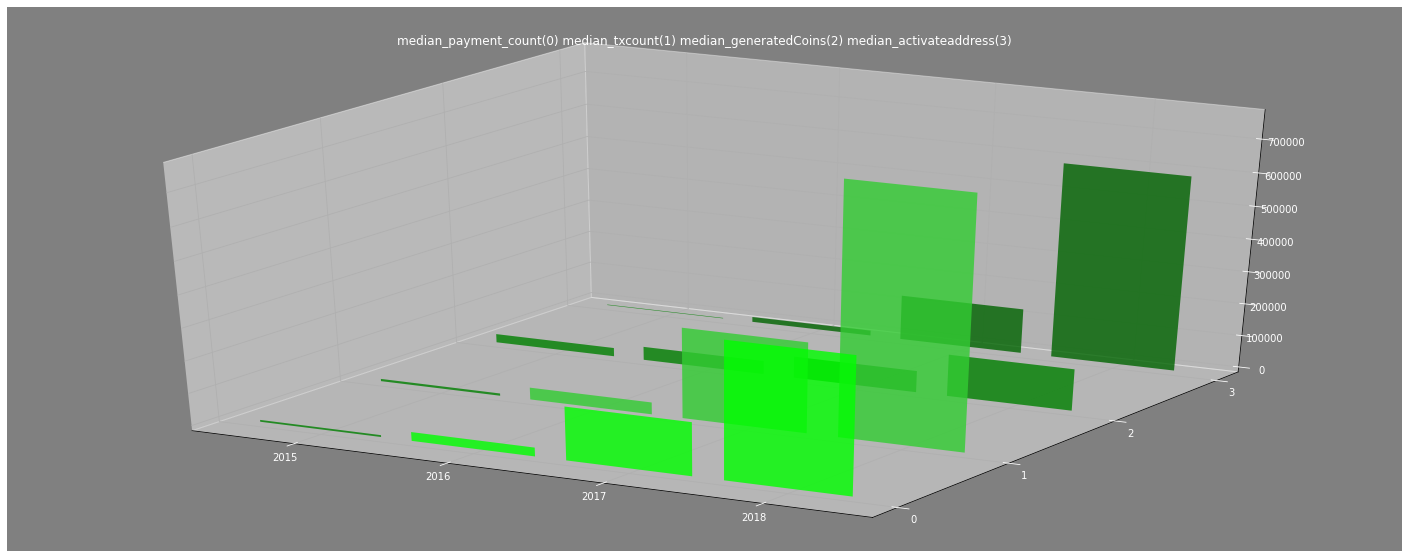

In [39]:
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

cnt=1
print("A random date: ",eth['date'][1])

total_year=[]

row_size = len(eth['date'])

for i in range(row_size-1):
  l1=len(eth['date'][i])-1
  l2=len(eth['date'][i+1])-1
  if eth['date'][i][l1]!=eth['date'][i+1][l2]:
    cnt+=1
    print(eth['date'][i][-4:])
    total_year.append(eth['date'][i][-4:])

print(eth['date'][1101][-4:])
total_year.append(eth['date'][1101][-4:])


print(total_year)



median_txcount=[]
median_payment_count=[]
median_generatedCoins=[]
median_activateaddress=[]



m_t=0
m_t_c=0
m_p=0
m_p_c=0
m_g=0
m_a=0

for i in range(row_size-1):
  l1=len(eth['date'][i])-1
  l2=len(eth['date'][i+1])-1


  if eth['date'][i][l1]!=eth['date'][i+1][l2]:

    median_txcount.append(m_t/m_t_c)
    median_payment_count.append(m_p/m_p_c)
    median_generatedCoins.append(m_g/m_t_c)
    median_activateaddress.append(m_a/m_t_c)


    m_t=0
    m_t_c=0
    m_p=0 
    m_p_c=0


  else:
    m_t+=eth['txCount'][i]
    m_t_c+=1
    m_p+=eth['paymentCount'][i]
    m_p_c+=1
    m_g+=eth['generatedCoins'][i]
    m_a+=eth['activeAddresses'][i]


median_txcount.append(m_t/m_t_c)
median_payment_count.append(m_p/m_p_c)
median_generatedCoins.append(m_g/m_t_c)
median_activateaddress.append(m_a/m_t_c)



print(median_payment_count,median_txcount,median_generatedCoins,median_activateaddress)

print(total_year)





PTGA=[median_payment_count,median_txcount,median_generatedCoins,median_activateaddress]

i=0

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(projection='3d',title='median_payment_count(0) median_txcount(1) median_generatedCoins(2) median_activateaddress(3)')

colors = ['LIME', 'limegreen', 'green', 'darkgreen']
yticks = [0,1,2,3]
for c, k in zip(colors, yticks):
    xs = total_year
    ys = PTGA[i]
    i+=1

    cs = [c] * len(xs)
    cs[0] = 'green'

    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

ax.set_facecolor('gray')

ax.set_yticks(yticks)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


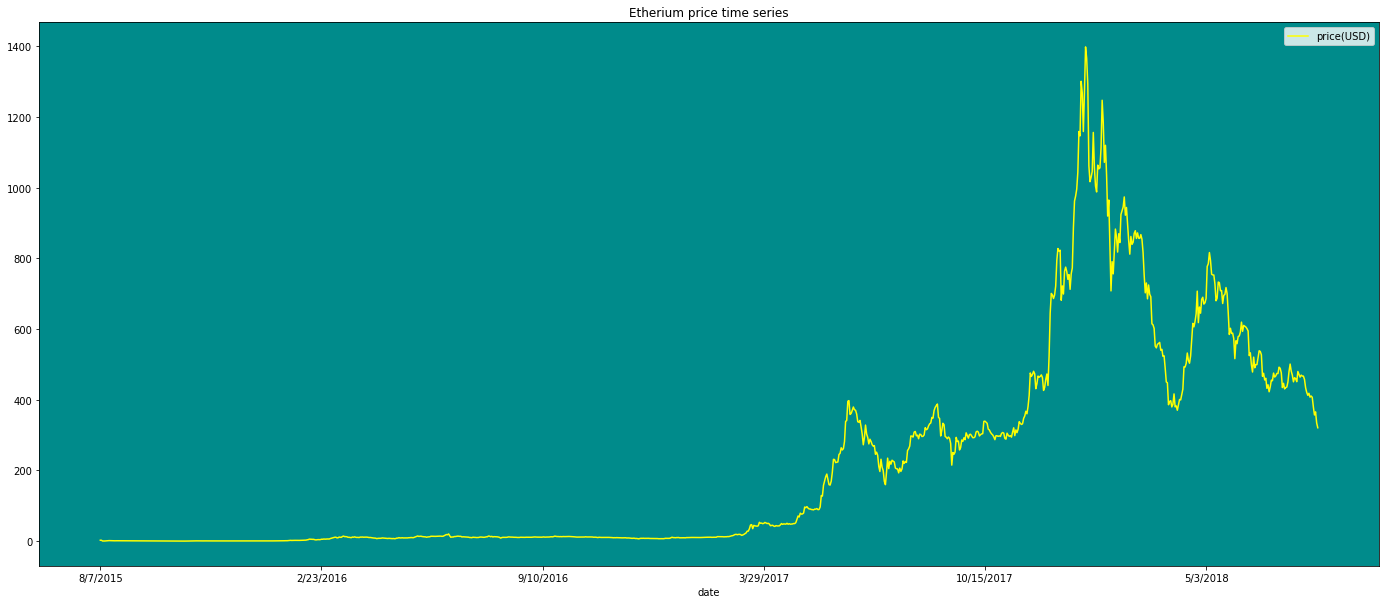

In [17]:
#Etherium price time series
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

eth.plot(kind='line',x='date',y='price(USD)',figsize=(24,10),title='Etherium price time series',color='yellow')
ax=plt.axes()
ax.set_facecolor('darkcyan')
ax.grid(False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


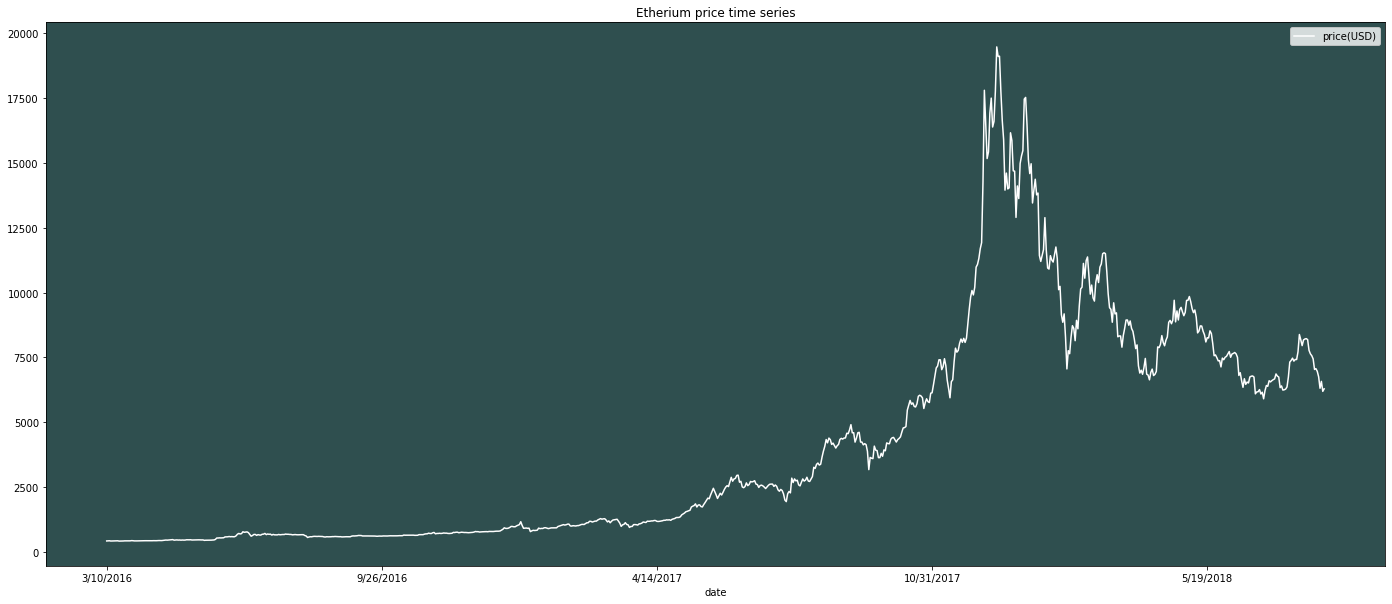

In [18]:
#bitcoin price time series
btc.plot(kind='line',x='date',y='price(USD)',figsize=(24,10),title='Etherium price time series',color='white')
ax=plt.axes()
ax.set_facecolor('darkslategray')
ax.grid(False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


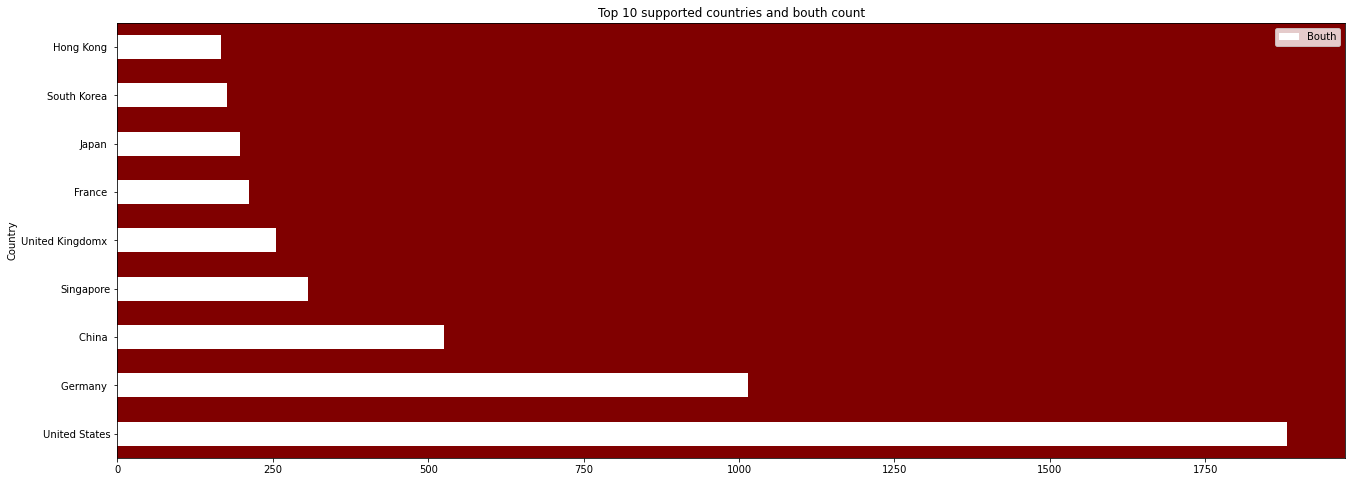

In [19]:
#Etherium supported contries
bouth.plot(kind='barh',x='Country',y='Bouth',figsize=(22,8),title='Top 10 supported countries and bouth count',color='white')
ax=plt.axes()
ax.set_facecolor('maroon')
ax.grid(False)
